In [199]:
%load_ext autoreload
%autoreload 2
import espaloma as esp
import torch
import pinot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
g = esp.Graph('c1ccccc1')

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [226]:
from espaloma.data.md import MoleculeVacuumSimulation
simulation = MoleculeVacuumSimulation(
        n_samples=20, n_steps_per_sample=10
)
simulation.run(g)


In [227]:
forcefield = esp.graphs.legacy_force_field.LegacyForceField('smirnoff99Frosst')
forcefield.parametrize(g)

In [228]:
layer = esp.nn.layers.dgl_legacy.gn()
representation = esp.nn.Sequential(layer, config=[32, 'relu', 32, 'relu'])

readout = esp.nn.readout.janossy.JanossyPooling(
    in_features=32, config=[32, 'tanh'],
    out_features={
        1: {'sigma': 1, 'epsilon': 1},
        2: {'coefficients': 2},
        3: {'k':1, 'eq': 1},
    },
)

net = torch.nn.Sequential(
    representation,
    readout,
    esp.mm.geometry.GeometryInGraph(),
    esp.mm.energy.EnergyInGraph(),
    esp.mm.energy.EnergyInGraph(suffix='_ref'),
)

In [229]:
optimizer = torch.optim.Adam(net.parameters(), 1e-5)

In [231]:
for _ in range(1000):
    optimizer.zero_grad()
    def l():
        
        net(g.heterograph)
        loss = torch.nn.MSELoss()(
            g.nodes['n2'].data['u_ref'],
            g.nodes['n2'].data['u'],
        )
        loss.backward()
        print(loss)
        return loss

    optimizer.step(l)

tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4629, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)


tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)


tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)


tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)


tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)
tensor(0.4628, grad_fn=<MeanBackward0>)


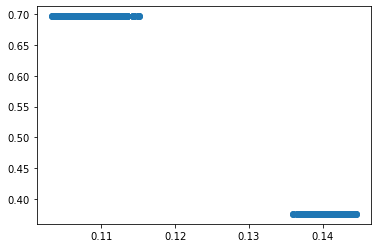

In [232]:
from matplotlib import pyplot as plt
plt.scatter(
    g.nodes['n2'].data['x'].detach().flatten(),
    g.nodes['n2'].data['u'].detach().flatten(),
)

In [233]:
g.nodes['n2'].data['coefficients']

tensor([[-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1051,  0.1220],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183],
        [-0.1040,  0.1183]], grad_fn=<AddmmBackward>)